<a href="https://colab.research.google.com/github/markpairdha/climate-change-time-series-analysis/blob/main/Climate_Change_timeseries_analysis_and_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/climate change time series/new_york_temperature.csv')
df.head()

,DATE,TAVG
0,1870,53.8
1,1871,51.3
2,1872,51.3
3,1873,50.9
4,1874,51.3


In [21]:
df.describe()

,DATE,TAVG
count,147.000000,147.000000
mean,1943.000000,53.948980
std,42.579338,1.666157
min,1870.000000,49.400000
25%,1906.500000,52.950000
50%,1943.000000,54.000000
75%,1979.500000,55.050000
max,2016.000000,57.300000


In [22]:
#Code To Check "Is Tempearture a Random Walk"
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

df.set_index('DATE',inplace=True)
df.head()

,TAVG
DATE,
1870,53.8
1871,51.3
1872,51.3
1873,50.9
1874,51.3


In [23]:
df.index=pd.to_datetime(df.index,format='%Y')
df.head()

,TAVG
DATE,
1870-01-01,53.8
1871-01-01,51.3
1872-01-01,51.3
1873-01-01,50.9
1874-01-01,51.3


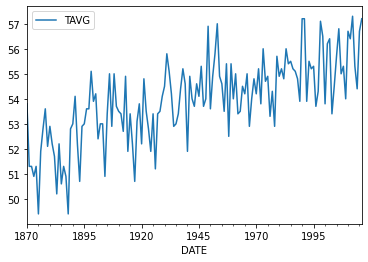

In [24]:
df.plot()
plt.show()

In [25]:
#Applying Dicky Fuller Test to test whether the temperature is Random walk or not

result=adfuller(df['TAVG'])
print("The P Value for the ADF test is : ",result[1])

The P Value for the ADF test is :  0.5832938987871142


***The P value for the ADF test is 0.58 which is greater than 0.5. Therefore, Temperature is a Random Walk.***

In [26]:
#Making the temperature stationary.

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
temp_change=df.diff()
temp_change.head()

,TAVG
DATE,
1870-01-01,NaN
1871-01-01,-2.5
1872-01-01,0.0
1873-01-01,-0.4
1874-01-01,0.4


In [27]:
#Dropping the first row

temp_change=temp_change.dropna()

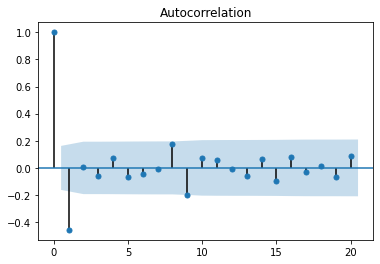

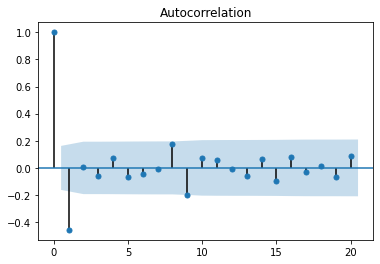

In [28]:
#Plotting the Autocorrelation Function

plot_acf(temp_change,lags=20)

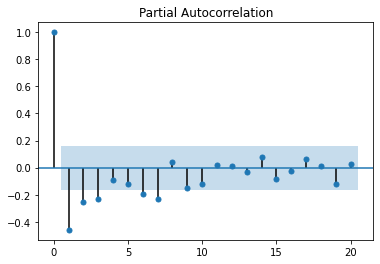

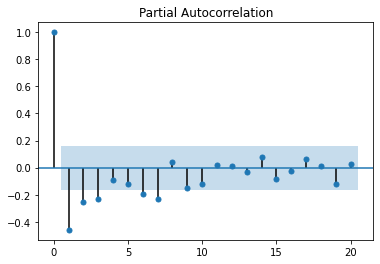

In [29]:
#Plotting the Partial Autocorrelation Function

plot_pacf(temp_change,lags=20)

In [30]:
#Finding which ARMA Model is best
#AR(1) Model
from statsmodels.tsa.arima_model import ARMA

mod=ARMA(temp_change,order=(1,0))
res=mod.fit()
print("The AIC for AR(1) is : ", res.aic)

The AIC for AR(1) is :  510.534689831391


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


In [31]:
#AR(2) Model 

mod1=ARMA(temp_change,order=(2,0))
res1=mod1.fit()
print("The AIC for AR(2) is : ",res1.aic)

The AIC for AR(2) is :  501.9274123160228


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


In [32]:
#MA(1) Model

mod2=ARMA(temp_change, order=(0,1))
res2=mod2.fit()
print("The AIC for MA(1) is : ",res2.aic)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


The AIC for MA(1) is :  469.3909708062573


In [33]:
#ARMA(1,1) Model

mod3=ARMA(temp_change,order=(1,1))
res3=mod3.fit()
print("The AIC for ARMA(1,1) is : ",res3.aic)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


The AIC for ARMA(1,1) is :  469.0729131153337


**The MA(1) and ARMA(1,1) have the two lowest AIC values.**

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


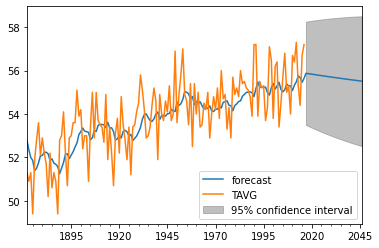

In [34]:
#We will be using ARMA(1,1) model to forecast temperature 

mod4=ARMA(df,order=(1,1,1))
res4=mod4.fit()
res4.plot_predict(start='1872-01-01',end='2046-01-01')
plt.show()

In [35]:
y_pred=res4.predict(start='1872-01-01',end='2046-01-01')
y_pred

1872-01-01    52.790149
1873-01-01    52.344585
1874-01-01    51.996791
1875-01-01    51.859788
1876-01-01    51.391903
                ...    
2042-01-01    55.558986
2043-01-01    55.547466
2044-01-01    55.536028
2045-01-01    55.524670
2046-01-01    55.513393
Freq: AS-JAN, Length: 175, dtype: float64